In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from lib import User, Movie, Recommender
import matplotlib.pylab as plt
import math
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
rec = Recommender(lam=0.01, gamma=0.01, tau=0.01)
rec.initialize_from_csv("ml-25m/movies.csv", "ml-25m/ratings.csv", train_test_split=True)
print(len(rec.users))
print(len(rec.movies))

Initialized
Parsed ml-25m/ratings.csv
Parsed ml-25m/movies.csv


Reformatting movie ratings: 100%|██████████| 59047/59047 [00:21<00:00, 2758.96it/s]  

162541
59047


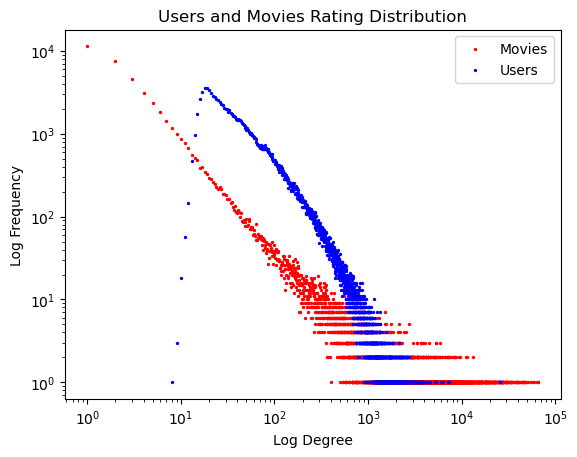

In [5]:
def plot_rating_distributions(rec):
    user_freq = {}
    movie_freq = {}

    #iterate over users
    for user in rec.users:
        degree = len(user.ratings)
        if degree not in user_freq:
            user_freq[degree] = 1
        else:
            user_freq[degree] += 1

    for movie in rec.movies:
        degree = len(movie.ratings)

        if degree not in movie_freq:
            movie_freq[degree] = 1
        else:
            movie_freq[degree] += 1

    m_deg = [degree for degree in movie_freq.keys()]
    m_freq = [freq for freq in movie_freq.values()]
    plt.scatter(m_deg, m_freq, c='red', s=2, label='Movies')

    u_deg = [degree for degree in user_freq.keys()]
    u_freq = [freq for freq in user_freq.values()]
    plt.scatter(u_deg, u_freq, c='blue', s=2, label='Users')
    plt.xscale("log")
    plt.yscale("log")


    plt.xlabel("Log Degree")
    plt.ylabel("Log Frequency")
    plt.legend()
    plt.title("Users and Movies Rating Distribution")

    plt.show()

plot_rating_distributions(rec)

In [6]:
def plot_statistics(statistics, train_test_split=True, biases_only=False, extra_stats=False):
    # Create two figures: one for biases and embeddings, another for RMSE and NLL
    fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))   # RMSE and NLL
    plt.tight_layout(pad=4.0)

    # Plot RMSE
    axes2[0].plot(statistics['RMSEs'], label='Train RMSE')
    if train_test_split:
        axes2[0].plot(statistics['RMSEs_test'], label='Test RMSE', linestyle='--')
    axes2[0].set_title('Root Mean Square Error')
    axes2[0].set_xlabel('Epoch')
    axes2[0].set_ylabel('RMSE')
    axes2[0].legend()

    # Plot Negative Log Likelihood
    axes2[1].plot(statistics['neg_log_liks'], label='Train NLL')
    if train_test_split:
        axes2[1].plot(statistics['neg_log_liks_test'], label='Test NLL', linestyle='--')
    axes2[1].set_title('Negative Log Likelihood')
    axes2[1].set_xlabel('Epoch')
    axes2[1].set_ylabel('NLL')
    axes2[1].legend()

    if extra_stats:
        fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Biases and Embeddings
        # Plot Mean User Bias
        axes1[0, 0].plot(statistics['mean_user_bias'], label='Mean User Bias')
        if train_test_split:
            axes1[0, 0].plot(statistics['mean_user_bias_test'], label='Mean User Bias Test', linestyle='--')
        axes1[0, 0].set_title('Mean User Bias')
        axes1[0, 0].set_xlabel('Epoch')
        axes1[0, 0].set_ylabel('Bias')
        axes1[0, 0].legend()

        # Plot Mean Item Bias
        axes1[0, 1].plot(statistics['mean_item_bias'], label='Mean Item Bias')
        if train_test_split:
            axes1[0, 1].plot(statistics['mean_item_bias_test'], label='Mean Item Bias Test', linestyle='--')
        axes1[0, 1].set_title('Mean Item Bias')
        axes1[0, 1].set_xlabel('Epoch')
        axes1[0, 1].set_ylabel('Bias')
        axes1[0, 1].legend()

        # Only plot the embedding lengths if not a biases_only model
        if not biases_only:
            axes1[1, 0].plot(statistics['user_embed_length'], label='User Embedding Length')
            if train_test_split:
                axes1[1, 0].plot(statistics['user_embed_length_test'], label='User Embedding Length Test', linestyle='--')
            axes1[1, 0].set_title('User Embedding Length')
            axes1[1, 0].set_xlabel('Epoch')
            axes1[1, 0].set_ylabel('Length')
            axes1[1, 0].legend()

            axes1[1, 1].plot(statistics['item_embed_length'], label='Item Embedding Length')
            if train_test_split:
                axes1[1, 1].plot(statistics['item_embed_length_test'], label='Item Embedding Length Test', linestyle='--')
            axes1[1, 1].set_title('Item Embedding Length')
            axes1[1, 1].set_xlabel('Epoch')
            axes1[1, 1].set_ylabel('Length')
            axes1[1, 1].legend()

    plt.show()



In [7]:
ratings = [("Lord of the Rings: The Fellowship of the Ring, The (2001)", 5.0)]
uid = rec.insert_dummy_user(ratings)
print(uid)

162542


In [8]:
ratings = [("Minions (2015)", 5.0)]
uid_2 = rec.insert_dummy_user(ratings)
print(uid_2)

162543


In [11]:
ratings = [("Fight Club (1999)", 5.0)]
uid_3 = rec.insert_dummy_user(ratings)
print(uid_3)

162545


Initialized variables and calculated statistics: 81.47827696800232s
Ran initial update to user and item biases: 7.476863384246826s


100%|██████████| 5/5 [09:58<00:00, 119.71s/it]


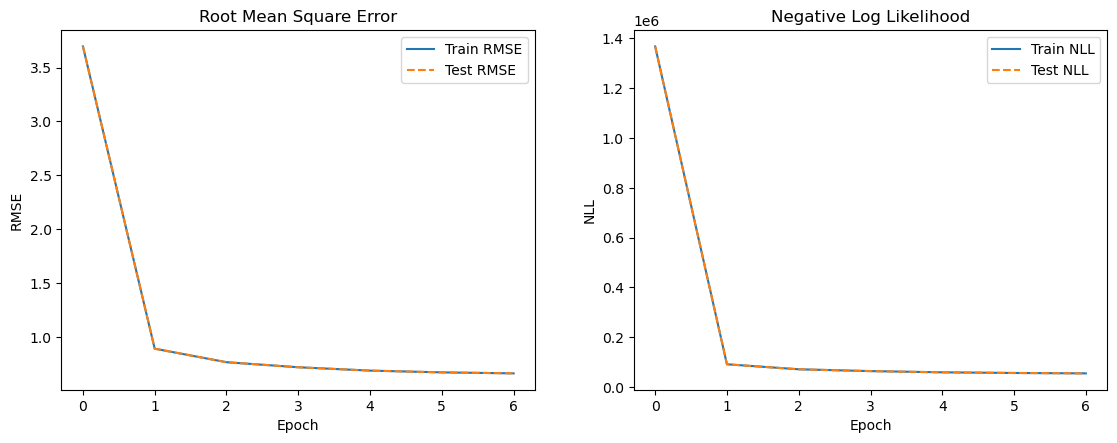

In [17]:
extra_stats = False
statistics = rec.fit(max_iter=5, extra_stats=extra_stats)
plot_statistics(statistics, train_test_split=True, extra_stats=extra_stats)

In [ ]:
pred_ratings, titles = rec.predict_movies_for_user(uid)
print(titles[0:10])
print(pred_ratings[0:10])
pred_ratings, titles = rec.predict_movies_for_user(uid_2)
print(titles[0:10])
print(pred_ratings[0:10])
pred_ratings, titles = rec.predict_movies_for_user(uid_3)
print(titles[0:10])
print(pred_ratings[0:10])

['Lord of the Rings: The Return of the King, The (2003)'
 'Lord of the Rings: The Fellowship of the Ring, The (2001)'
 'Lord of the Rings: The Two Towers, The (2002)'
 'Hobbit: An Unexpected Journey, The (2012)'
 'Hobbit: The Desolation of Smaug, The (2013)'
 'The Hobbit: The Battle of the Five Armies (2014)'
 'Passion of the Christ, The (2004)' 'The Blue Planet (2001)'
 'Braveheart (1995)' 'Star Wars: Episode IV - A New Hope (1977)']
[4.91504746 4.87661026 4.84844144 3.25146831 3.1203337  2.92934871
 2.69625096 2.6629001  2.4928766  2.36523389]
['Minions (2015)' 'Despicable Me 2 (2013)'
 'Ice Age 4: Continental Drift (2012)' 'Despicable Me (2010)'
 'Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)'
 'What the #$*! Do We Know!? (a.k.a. What the Bleep Do We Know!?) (2004)'
 'Ice Age: Dawn of the Dinosaurs (2009)'
 "Madagascar 3: Europe's Most Wanted (2012)"
 'Ice Age: Collision Course (2016)' 'Cars 2 (2011)']
[4.78353854 4.02202827 3.63832246 3.6150821  3.47647344 3.41447903

[1367450.642701168, 91678.5404002969, 71570.2312072223, 64534.36920312081, 59828.305388480454, 57102.96663154565, 55445.43666542723, 54340.75737410747, 53534.135882829614, 52903.81004733968, 52388.1635722978, 51953.213951179576, 51578.3764978698, 51249.935630702596, 50958.094141558446, 50695.58626397952, 50456.925221658305, 50237.93014267942, 50035.37713333305, 49846.73864763808, 49670.00881852275, 49503.58550974876]
